<a href="https://colab.research.google.com/github/axk6637/ai4all/blob/main/EnergyUsage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict future energy usage/consumption.**






# Understanding the Dataset

1. Import Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

2. Import and Read Dataset


In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#connect to Kaggle using token
import os
# Import OS for navigation and environment set up
import os
# Check current location
os.getcwd()
# Enable the Kaggle environment, use the path to the directory your Kaggle.json file
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [6]:
!pip install kaggle

In [7]:
import os
# Navigate into Drive where you want to store your Kaggle data
os.chdir('/content/drive/MyDrive/kaggle')
# Paste and run the copied API command, the data will download to the current directory
!kaggle datasets download anshtanwar/global-data-on-sustainable-energy
# Check contents of directory, you should see the .zip file for the competition in your Drive
os.listdir()

Dataset URL: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy
License(s): Attribution 4.0 International (CC BY 4.0)
global-data-on-sustainable-energy.zip: Skipping, found more recently modified local copy (use --force to force download)


['global-data-on-sustainable-energy (1).csv',
 'global-data-on-sustainable-energy.zip',
 'kaggle.json',
 'global-data-on-sustainable-energy.csv',
 'random_forest_model.pkl',
 'xgboost_model.pkl',
 'streamlit_app.py',
 'requirement.txt']

In [8]:
!unzip global-data-on-sustainable-energy (1).zip

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip global-data-on-sustainable-energy (1).zip'


In [9]:
df=pd.read_csv("global-data-on-sustainable-energy.csv")
df


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [10]:
# Print the first 10 rows of the dataset
df.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


In [11]:
df.shape

(3649, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [13]:
# Statistical measures about the data
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


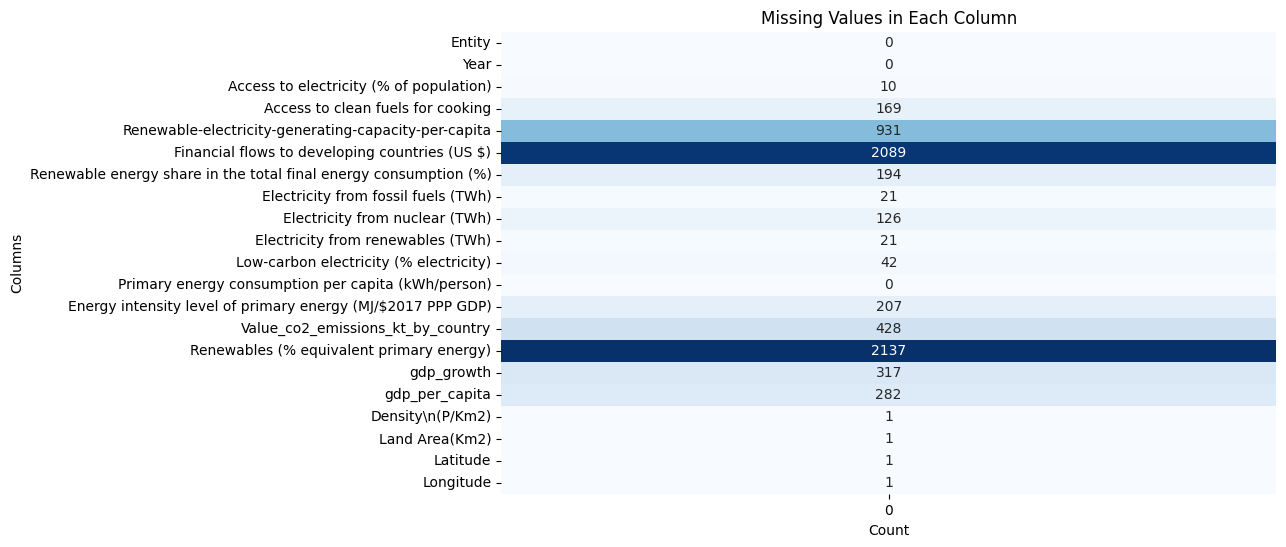

In [14]:
#show missing values
missing_values = df.isnull().sum()
# Create a heatmap
fig_missing_values = plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)

plt.title('Missing Values in Each Column')
plt.xlabel('Count')
plt.ylabel('Columns')

plt.show()


In [15]:
# Dynamic world map with a slider
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        filtered_df = df[df['Year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Cividis',
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name} Map with slider',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
         )
    fig.show()

# Example usage
column_name = 'Primary energy consumption per capita (kWh/person)'
plot_world_map_with_slider(column_name)
column_name = 'Access to electricity (% of population)'
plot_world_map_with_slider(column_name)


In [16]:
df.dtypes

,0
Entity,object
Year,int64
Access to electricity (% of population),float64
Access to clean fuels for cooking,float64
Renewable-electricity-generating-capacity-per-capita,float64
Financial flows to developing countries (US $),float64
Renewable energy share in the total final energy consumption (%),float64
Electricity from fossil fuels (TWh),float64
Electricity from nuclear (TWh),float64
Electricity from renewables (TWh),float64


# Data Cleansing/Preparation


In [17]:
#Check why Density has object datatype

df['Density\\n(P/Km2)'].unique()


array(['60', '105', '18', '26', '223', '17', '104', '590', '3', '109',
       '123', '41', '2,239', '1,265', '668', '47', '383', '108', '1281',
       '20', '64', '4', '25', '76', '463', '95', '56', '274', '8', '13',
       '153', '46', '467', '100', '73', '106', '131', '136', '137', '43',
       '96', '225', '71', '103', '313', '50', '35', '31', '67', '115',
       '49', '119', nan, '9', '239', '57', '240', '81', '331', '167',
       '53', '70', '414', '89', '107', '464', '151', '93', '400', '206',
       '273', '347', '7', '94', '147', '34', '30', '667', '242', '48',
       '203', '99', '1,802', '1,380', '5', '626', '66', '2', '83', '40',
       '541', '508', '16', '55', '19', '226', '15', '287', '58', '368',
       '124', '111', '248', '84', '525', '205', '301', '284', '87', '214',
       '8,358', '114', '341', '219', '68', '152', '110', '393', '229',
       '75', '118', '281', '36', '79', '38'], dtype=object)

In [18]:
#Remove commas from Density column
df['Density\\n(P/Km2)'] = df['Density\\n(P/Km2)'].str.replace(',', '')

#Convert to numeric
df['Density\\n(P/Km2)'] = pd.to_numeric(df['Density\\n(P/Km2)'], errors='coerce')

In [19]:
#pull numeric features
df_with_numeric_features=df.select_dtypes(exclude=[object])
print ("Numeric Features:")
for col in df_with_numeric_features:
  print (f"{col}")

Numeric Features:
Year
Access to electricity (% of population)
Access to clean fuels for cooking
Renewable-electricity-generating-capacity-per-capita
Financial flows to developing countries (US $)
Renewable energy share in the total final energy consumption (%)
Electricity from fossil fuels (TWh)
Electricity from nuclear (TWh)
Electricity from renewables (TWh)
Low-carbon electricity (% electricity)
Primary energy consumption per capita (kWh/person)
Energy intensity level of primary energy (MJ/$2017 PPP GDP)
Value_co2_emissions_kt_by_country
Renewables (% equivalent primary energy)
gdp_growth
gdp_per_capita
Density\n(P/Km2)
Land Area(Km2)
Latitude
Longitude


In [20]:
df_with_non_numeric_features = df.select_dtypes(include=['object'])
print("Non-numeric columns:")
for col in df_with_non_numeric_features:
    print(f"{col}")

Non-numeric columns:
Entity


In [21]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

Check Feature Importance

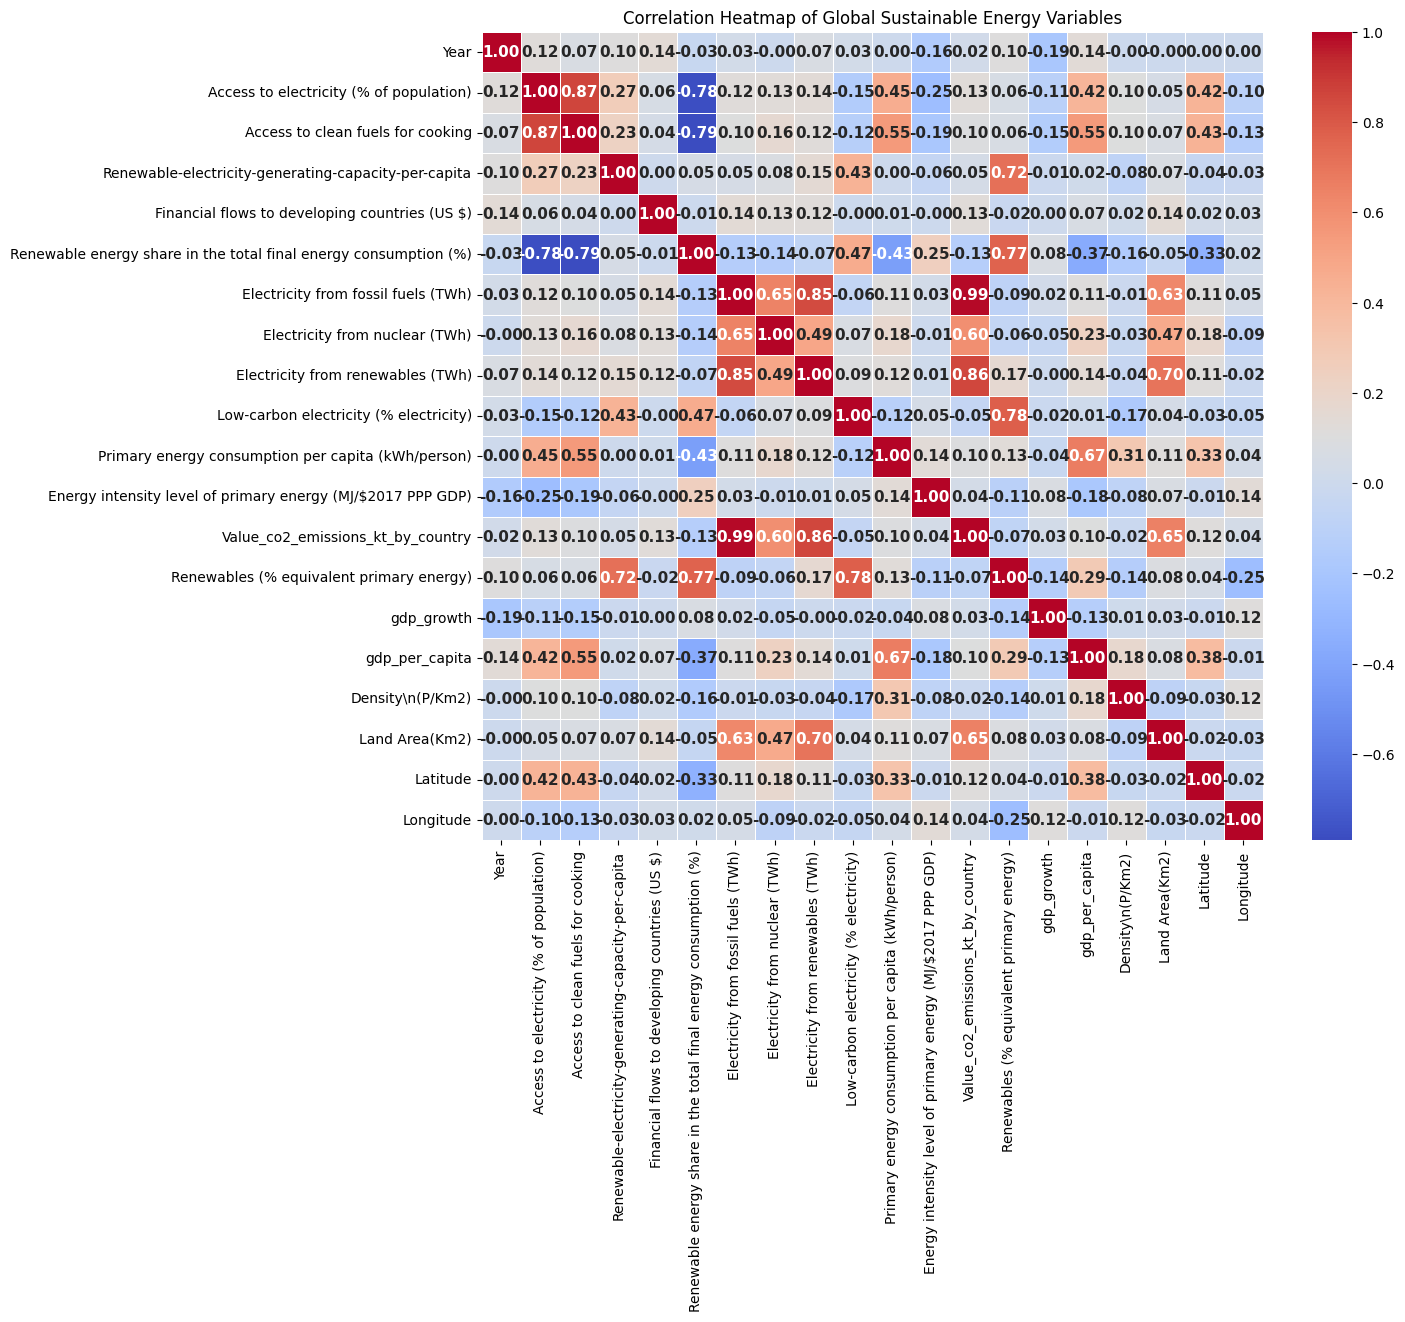

In [22]:
#Use a correlation matrix to see feature importance
correlation_matrix= df_with_numeric_features.corr()

#Seeting up the matpplotlib figure
plt.figure(figsize=(len(df.columns) * 0.6, len(df.columns) * 0.5))

#Creating a heatmap
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm', fmt=".2f", linewidths=.5,  annot_kws={'fontsize':11, 'fontweight':'bold'})
# Set the title of the heatmap
plt.title("Correlation Heatmap of Global Sustainable Energy Variables")

# Show the plot
plt.show()

In [23]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [24]:
X=df.drop(columns=['Primary energy consumption per capita (kWh/person)', 'Entity'],axis=1)
Y=df['Primary energy consumption per capita (kWh/person)']


In [25]:
X.shape

(3649, 19)

In [26]:
Y.shape

(3649,)

In [27]:
X_train, X_test, y_train,y_test =train_test_split(X,Y,test_size=0.2, random_state=2)

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor


X_encoded = X_train.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_encoded, y_train)


RandomForestRegressor(random_state=42)

19 19


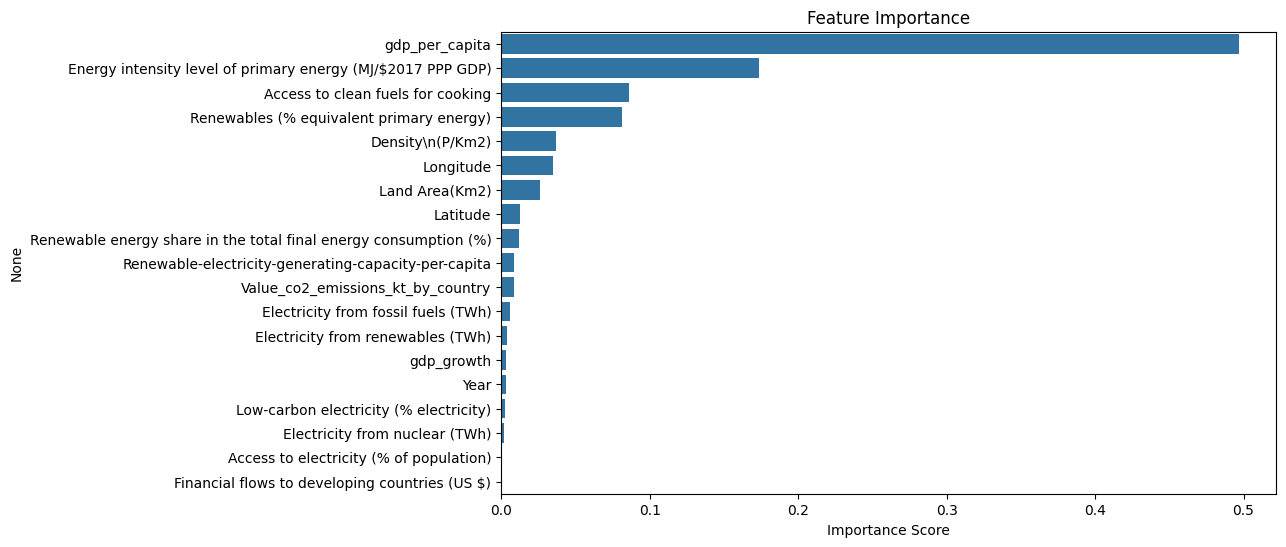

In [29]:
feature_importance = rf_model.feature_importances_
features = X_train.columns
# Check lengths
print(len(features), len(feature_importance))

# Sort and plot
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [30]:
#Delete columns with missing values and weak correlation with target variable: Primary energy consumption per capita (kWh/person)

df.drop(['Financial flows to developing countries (US $)'], axis=1, inplace=True)

In [31]:
df.head(20)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60.0,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,21.17,0.19,0.0,0.54,73.972600,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60.0,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,16.53,0.16,0.0,0.78,82.978720,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60.0,652230.0,33.93911,67.709953


In [32]:
#check foir missing values in remaining columns
df.isnull().sum()

,0
Entity,0
Year,0
Access to electricity (% of population),10
Access to clean fuels for cooking,169
Renewable-electricity-generating-capacity-per-capita,931
Renewable energy share in the total final energy consumption (%),194
Electricity from fossil fuels (TWh),21
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21
Low-carbon electricity (% electricity),42


In [33]:
linear_interp_cols = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'Renewables (% equivalent primary energy)',
    'gdp_growth',
    'gdp_per_capita'
]


# Interpolate missing values within each country
for col in linear_interp_cols:
    df[col] = df.groupby('Entity')[col].transform(lambda x: x.interpolate(method='linear').ffill().bfill())

# Nuclear: often missing because zero — fill with 0
df['Electricity from nuclear (TWh)'] = df['Electricity from nuclear (TWh)'].fillna(0)

# Static geo/density columns: fill with country average
geo_cols = ['Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']

for col in geo_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Invalid strings become NaN
    df[col] = df.groupby('Entity')[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df[col].fillna(df[col].mean())  # Final fallback

# Check for any columns still missing
print("Remaining missing values per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Remaining missing values per column:
Access to electricity (% of population)                                1
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Renewable energy share in the total final energy consumption (%)      21
Electricity from fossil fuels (TWh)                                   21
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Energy intensity level of primary energy (MJ/$2017 PPP GDP)           22
Value_co2_emissions_kt_by_country                                    253
Renewables (% equivalent primary energy)                            2137
gdp_growth                                                           232
gdp_per_capita                                                       232
dtype: int64


In [34]:
# List of columns to impute
columns_to_impute = [
    'Access to clean fuels for cooking',
    'Access to electricity (% of population)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Renewable energy share in the total final energy consumption (%)',
    'Renewable-electricity-generating-capacity-per-capita',
    'Electricity from fossil fuels (TWh)',
    'Value_co2_emissions_kt_by_country',
    'Renewables (% equivalent primary energy)',
    'gdp_growth',
    'gdp_per_capita'
]

# Apply interpolation per country
for col in columns_to_impute:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df.groupby('Entity')[col].transform(lambda x: x.interpolate(method='linear').ffill().bfill())
    # Fill with country mean
    df[col] = df.groupby('Entity')[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df[col].fillna(df[col].mean())  # final fallback (global mean)

In [35]:
# Check for any columns still missing
print("Remaining missing values per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Remaining missing values per column:
Series([], dtype: int64)


# Training Random Forest Regressor

Train Random Forest Regressor


In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [37]:
# Drop rows where the target is missing.
target= 'Primary energy consumption per capita (kWh/person)'
df_rf = df.dropna(subset=[target])

In [38]:
# Define features
X = df_rf.drop(columns=[target, 'Entity', 'Year'])
y = df_rf[target]

In [39]:
#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
#training random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Evaluating Random Forest Regressor

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Define thresholds
q25 = np.percentile(y_test, 25)
q75 = np.percentile(y_test, 75)

# Segment test data
low_usage = y_test < q25
mid_usage = (y_test >= q25) & (y_test <= q75)
high_usage = y_test > q75

# Calculate MAE for each group
mae_low = mean_absolute_error(y_test[low_usage], y_pred[low_usage])
mae_mid = mean_absolute_error(y_test[mid_usage], y_pred[mid_usage])
mae_high = mean_absolute_error(y_test[high_usage], y_pred[high_usage])

print(f"MAE for Low Usage (<25th percentile): {mae_low:.2f}")
print(f"MAE for Mid Usage (25th–75th percentile): {mae_mid:.2f}")
print(f"MAE for High Usage (>75th percentile): {mae_high:.2f}")

R² Score: 0.9670
Mean Squared Error: 38330927.55
Mean Absolute Error: 1920.09
MAE for Low Usage (<25th percentile): 158.72
MAE for Mid Usage (25th–75th percentile): 1076.91
MAE for High Usage (>75th percentile): 5358.62


In [42]:
import numpy as np

print("Min Usage:", y_test.min())
print("Max Usage:", y_test.max())
print("Mean Usage:", y_test.mean())
print("Median Usage:", np.median(y_test))
print("25th Percentile:", np.percentile(y_test, 25))
print("75th Percentile:", np.percentile(y_test, 75))


Min Usage: 0.0
Max Usage: 232316.58
Mean Usage: 26828.59332869315
Median Usage: 14951.601999999999
25th Percentile: 3388.6686
75th Percentile: 35847.50025


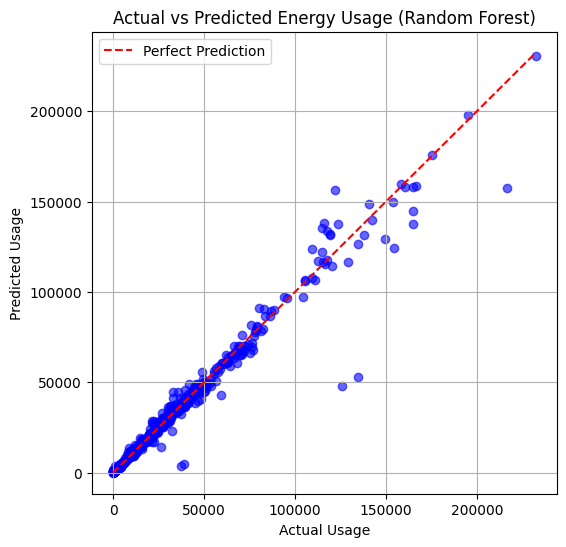

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Perfect prediction line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.title('Actual vs Predicted Energy Usage (Random Forest)')
plt.xlabel('Actual Usage')
plt.ylabel('Predicted Usage')
plt.legend()
plt.grid(True)
plt.show()

**Overall:** Random Forest is performing strongly with low prediction errors and high variance explanation.<br>
**R² Score: 0.9670**
* The model explains ~96.7% of the variance in the test set.
* This is very strong, suggesting the model captures the relationship between features and energy usage well.

**Mean Absolute Error (MAE):**

* Our MAE is approximately 1,920, meaning on average the model’s predictions differ from the actual energy usage by about 1,920 units.
* After segmenting our data as per usage levels, we observed that our model performs well for low-usage and mid-usage countries and struglles with large consumption values.

**Mean Squared Error (MSE): ~38330927.55**'
* Comparing MSE to MAE shows that some large errors exist in the dataset, likely from high-consumption countries which matches the scatter plot where high values are more scattered.

**Conclusion:**<br>
Our scatter plot shows that the model predicts low and moderate energy usage very accurately, with tight clustering near the perfect prediction line. However, at higher energy usage levels, predictions become more scattered, indicating the model struggles with extreme consumption patterns, likely due to fewer high-value data points and Random Forest’s averaging nature.









# Training XGBoost Regressor

In [44]:
!pip install xgboost

In [45]:
from xgboost import XGBRegressor

In [46]:
target = 'Primary energy consumption per capita (kWh/person)'

# Drop rows with missing target
df_xgb = df.dropna(subset=[target])

# Features and target
X = df_xgb.drop(columns=[target, 'Entity', 'Year'])
y = df_xgb[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

# Evaluating XGBoost Regressor

In [48]:
y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"XGBoost R² Score: {r2:.4f}")
print(f"XGBoost MSE: {mse:.2f}")
print(f"XGBoost MAE: {mae:.2f}")

XGBoost R² Score: 0.9680
XGBoost MSE: 37169311.80
XGBoost MAE: 2205.06


In [49]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'min_child_weight': [1, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
#Setting up RandomizedSearchCV

xgb = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,  # number of different combinations to try
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [50]:
random_search.fit(X_train, y_train)
print("Best Parameters:")
print(random_search.best_params_)

tuned_model = random_search.best_estimator_

# Evaluate best model
y_pred_best = tuned_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(f"Tuned R² Score: {r2_score(y_test, y_pred_best):.4f}")
print(f"Tuned MSE: {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"Tuned MAE: {mean_absolute_error(y_test, y_pred_best):.2f}")



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:
{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Tuned R² Score: 0.9761
Tuned MSE: 27691365.67
Tuned MAE: 2041.58


In [51]:
# Define thresholds
q25 = np.percentile(y_test, 25)
q75 = np.percentile(y_test, 75)

# Segment test data
low_usage = y_test < q25
mid_usage = (y_test >= q25) & (y_test <= q75)
high_usage = y_test > q75

# Calculate MAE for each group
mae_low = mean_absolute_error(y_test[low_usage], y_pred_best[low_usage])
mae_mid = mean_absolute_error(y_test[mid_usage], y_pred_best[mid_usage])
mae_high = mean_absolute_error(y_test[high_usage], y_pred_best[high_usage])

print(f"MAE for Low Usage (<25th percentile): {mae_low:.2f}")
print(f"MAE for Mid Usage (25th–75th percentile): {mae_mid:.2f}")
print(f"MAE for High Usage (>75th percentile): {mae_high:.2f}")

MAE for Low Usage (<25th percentile): 307.07
MAE for Mid Usage (25th–75th percentile): 1419.31
MAE for High Usage (>75th percentile): 5013.83


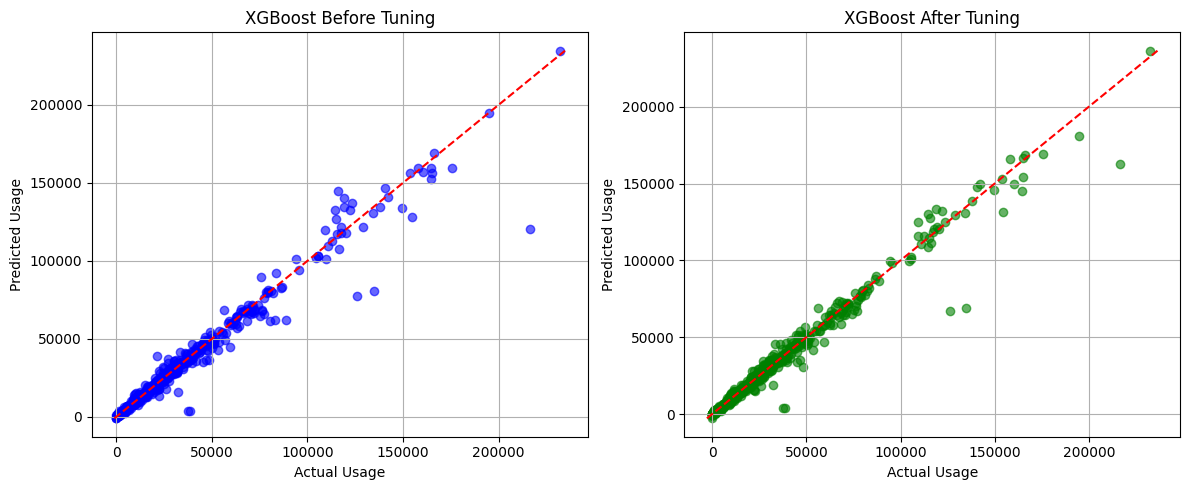

In [52]:
plt.figure(figsize=(12,5))

# Before tuning
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.title('XGBoost Before Tuning')
plt.xlabel('Actual Usage')
plt.ylabel('Predicted Usage')
plt.grid(True)

# After tuning
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_best, color='green', alpha=0.6)
min_val = min(min(y_test), min(y_pred_best))
max_val = max(max(y_test), max(y_pred_best))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.title('XGBoost After Tuning')
plt.xlabel('Actual Usage')
plt.ylabel('Predicted Usage')
plt.grid(True)

plt.tight_layout()
plt.show()

**Overall:** The model is highly accurate, with small residual errors and good trend-following ability. <br>
**Why did we hypertune?**<br>
Hyperparameter tuning via RandomizedSearchCV was used to:
*   Avoid overfitting/underfitting.
*   Find an optimal balance between bias and variance.
*  See if performance could be pushed beyond the already strong baseline.
Even if tuning didn't make a big diffeence, it was important to verify that out baseline model was optimal.

**Our Final Results:**

*   Before Tuning: R² ~0.9680, strong baseline, low errors.
*   After Tuning: R² ~0.9761, slightly lower errors (MSE and MAE).
*   Our gain:  Marginal improvement (~1% R²), which is expected when the baseline is already near-optimal.

**Conclusion**
*   The model is highly predictive and generalizes well.
*   Hyperparameter tuning provided validation rather than drastic improvement, confirming that the feature set and baseline XGBoost parameters were already well-suited to the problem.


















# Final Model Selection and Evaluation


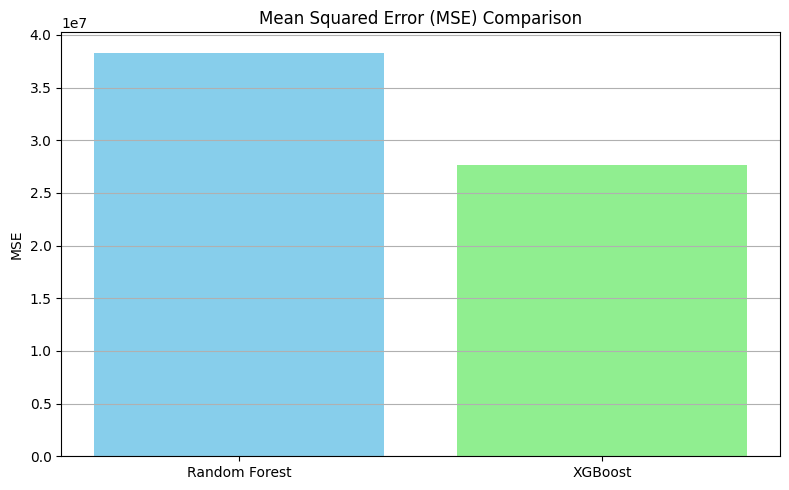

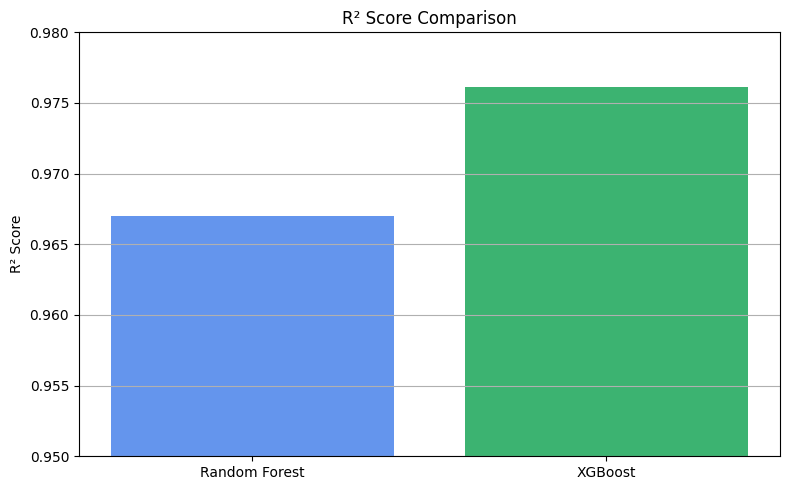

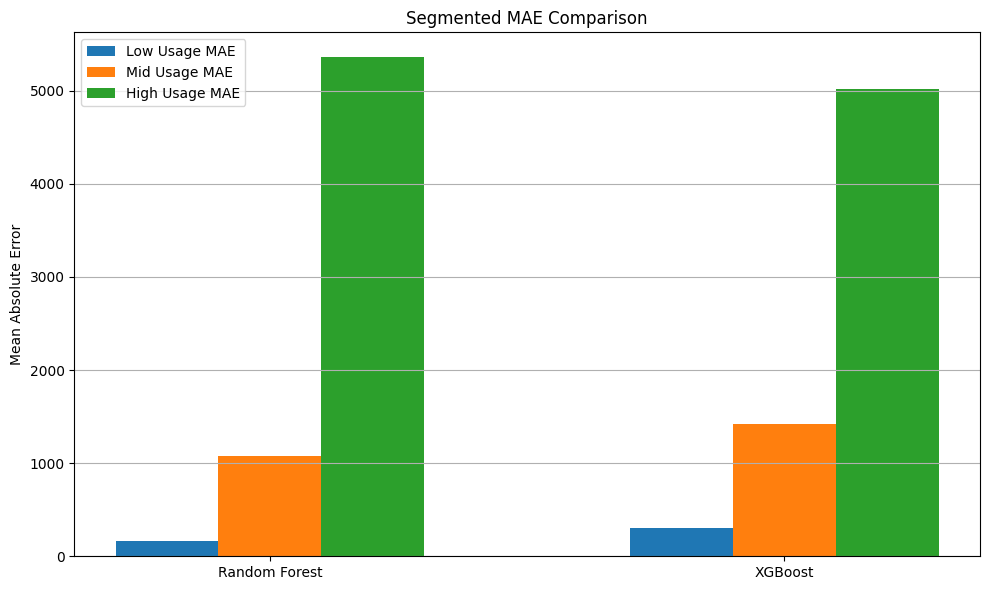

In [55]:
import matplotlib.pyplot as plt
models = ['Random Forest', 'XGBoost']

# Global Evaluation Metrics
r2_scores = [0.9670, 0.9761]
maes = [1920.09, 2041.58]
mses = [38330927.55,27691365.67]

#Segmented MAEs
mae_low = [158.72, 307.07]
mae_mid = [1076.91, 1419.31]
mae_high = [5358.62, 5013.83]


#Bar Chart 1: MSE Comparison
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(models, mses, color=['skyblue', 'lightgreen'])
ax1.set_title('Mean Squared Error (MSE) Comparison')
ax1.set_ylabel('MSE')
ax1.grid(True, axis='y')
plt.tight_layout()
plt.show()

#Bar Chart 2: R² Score Comparison
fig2, ax2 = plt.subplots(figsize=(8, 5))
ax2.bar(models, r2_scores, color=['cornflowerblue', 'mediumseagreen'])
ax2.set_title('R² Score Comparison')
ax2.set_ylabel('R² Score')
ax2.set_ylim([0.95, 0.98])
ax2.grid(True, axis='y')
plt.tight_layout()
plt.show()

#Bar Chart 3: Segmented MAE Comparison
x = np.arange(len(models))  # [0, 1]
width = 0.2

fig3, ax3 = plt.subplots(figsize=(10, 6))
ax3.bar(x - width, mae_low, width, label='Low Usage MAE')
ax3.bar(x, mae_mid, width, label='Mid Usage MAE')
ax3.bar(x + width, mae_high, width, label='High Usage MAE')

ax3.set_xticks(x)
ax3.set_xticklabels(models)
ax3.set_title('Segmented MAE Comparison')
ax3.set_ylabel('Mean Absolute Error')
ax3.legend()
ax3.grid(True, axis='y')
plt.tight_layout()
plt.show()


# Model Extraction and Deployment


In [ ]:
import joblib

# Save trained models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(tuned_model, 'xgboost_model.pkl')

****